### Project 3 -  Natural Language Processing on Parenting Related Reddit
## Notebook 4/4: Predicting

#### Kristina Joos

Notebook 1: Obtaining Data.  
Notebook 2: Cleaning and Modifying Data.  
Notebook 3: Modeling.  
Notebook 4: Predicting.  

---




# 4. Predicting

---
## 4.1. Importing

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading Attachment Parenting Data as d_df:
atp_df = pd.read_csv('../data/attachmentparenting.csv')
# Reading Parenting Data as d_df:
p_df = pd.read_csv('../data/parenting.csv')
# Reading Traditional Parenting Data as d_df:
trp_df = pd.read_csv('../data/traditionalparenting.csv')
# Reading DIY Data Set as diy_df:
diy_df = pd.read_csv('../data/diy.csv')
# Reading Training Data Set as depression_df:

d_df = pd.read_csv('../data/depression.csv')
# Load best model cvect_mnb_gs from Notebook 3
%store -r

### 4.2.1. Defining X and y

In [6]:
X = d_df['doc']
y = d_df['class']

### 4.2.2. Instantiat TFIDF Vectorizer

In [7]:
cvect_mnb_gs.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 3000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'mnb__alpha': 1}

In [8]:
cvect = CountVectorizer(max_df = 0.8,
                       max_features= 3000,
                       min_df= 3,
                       ngram_range= (1,2),
                        stop_words = ['sleep', 'bed', 'night'])

In [9]:
X = cvect.fit_transform(X)

In [10]:
X # Spares Matrix

<5298x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 633870 stored elements in Compressed Sparse Row format>

In [11]:
X_df = pd.DataFrame(X.toarray(),
                         columns=cvect.get_feature_names())


---
## 4.3. Fit best model from Notebook 3 to the whole training set  

### 4.3.1. Fit Model

In [12]:
mnb = MultinomialNB(alpha=1)

In [13]:
mnb.fit(X_df, y)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [14]:
mnb.score(X_df, y)

0.8942997357493394

---
## 4.4. Vectorize test data:

### 4.4.1. Defining X

In [15]:
X_p = p_df['doc']
X_atp = atp_df['doc']
X_trp = trp_df['doc']
X_diy = diy_df['doc']

### 4.4.2. TFIDF Vectorizer

In [16]:
X_atp = cvect.transform(X_atp)
X_trp = cvect.transform(X_trp)
X_p = cvect.transform(X_p)
X_diy = cvect.transform(X_diy)

In [17]:
X_atp_df = pd.DataFrame(X_atp.toarray(),
                         columns=cvect.get_feature_names())

X_trp_df = pd.DataFrame(X_trp.toarray(),
                         columns=cvect.get_feature_names())


X_p_df = pd.DataFrame(X_p.toarray(),
                         columns=cvect.get_feature_names())


X_diy_df = pd.DataFrame(X_diy.toarray(),
                         columns=cvect.get_feature_names())


---
## 4.5. Predict test data:

### 4.5.1. X_atp_df

In [18]:
atp_df['predict'] = mnb.predict(X_atp_df)

In [19]:
atp_df['predict_proba'] = mnb.predict_proba(X_atp_df)[:,1]

In [20]:
atp_df.shape

(905, 11)

### 4.5.2. X_trp_df

In [21]:
trp_df['predict'] = mnb.predict(X_trp_df)

In [22]:
trp_df['predict_proba'] = mnb.predict_proba(X_trp_df)[:,1]

### 4.5.3. X_p_df

In [23]:
p_df['predict'] = mnb.predict(X_p_df)

p_df['predict_proba'] = mnb.predict_proba(X_p_df)[:,1]

### 4.5.4. X_diy_df

In [24]:
diy_df['predict'] = mnb.predict(X_diy_df)
diy_df['predict_proba'] = mnb.predict_proba(X_diy_df)[:,1]



---
## 4.6. Results:  

In [25]:
predictions_dict = {}

### 4.6.1. X_atp_df

In [26]:
predictions_dict['Attachment Parenting'] = [atp_df['predict'].mean(), atp_df['predict_proba'].mean()]

### 4.6.2. X_trp_df

In [27]:
predictions_dict['Sleep Train'] = [trp_df['predict'].mean(), trp_df['predict_proba'].mean()]

### 4.6.3. X_p_df

In [28]:
predictions_dict['Parenting'] = [p_df['predict'].mean(), p_df['predict_proba'].mean()]

### 4.6.4. X_diy_df

In [29]:
predictions_dict['DIY'] = [diy_df['predict'].mean(), diy_df['predict_proba'].mean()]

In [30]:
p_df.predict_proba.describe()

count    9.030000e+02
mean     3.227446e-01
std      4.434924e-01
min      5.534262e-70
25%      2.378754e-09
50%      1.019065e-03
75%      9.740642e-01
max      1.000000e+00
Name: predict_proba, dtype: float64

In [31]:
diy_df[['predict', 'predict_proba']].describe()

,predict,predict_proba
count,540.000000,5.400000e+02
mean,0.012963,3.407916e-02
std,0.113220,1.245401e-01
min,0.000000,4.401334e-289
25%,0.000000,4.708126e-29
50%,0.000000,2.348531e-16
75%,0.000000,1.040740e-07
max,1.000000,9.647131e-01


### 4.6.5. Predictions Overview

__Overview DataFrame:__

In [32]:
predictions_df = pd.DataFrame(predictions_dict, index = ['Percentage of Class Depressed', 'Average Probability of Depressed'])

In [33]:
pd.options.display.float_format = '{:.2f}%'.format
new_cols = ['Attachment Parenting', 'Sleep Train', 'Parenting', 'DIY']
predictions_df = predictions_df[new_cols]
predictions_df = predictions_df*100
predictions_df

,Attachment Parenting,Sleep Train,Parenting,DIY
Percentage of Class Depressed,37.24%,15.40%,31.89%,1.30%
Average Probability of Depressed,38.23%,15.97%,32.27%,3.41%


__Bar Chart 'Percentage of Class Depressed'__

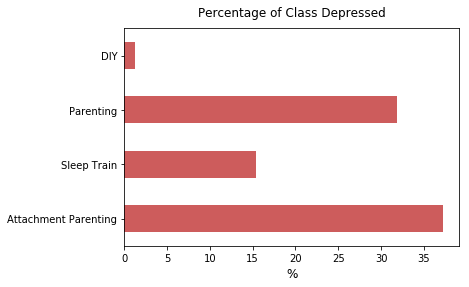

In [34]:
predictions_df.iloc[0].plot(kind='barh', color = '#CD5C5C');
plt.title('Percentage of Class Depressed', pad = 12.0, fontsize =12)
plt.xlabel('%', fontsize =12);

__Bar Chart 'Average Propability of Depressed'__

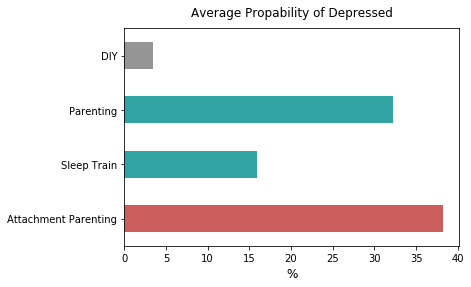

In [65]:
predictions_df.iloc[1].plot(kind='barh', color = ['#CD5C5C', '#32a3a3', '#32a3a3', '#959595']);
plt.title('Average Propability of Depressed', pad = 12.0, fontsize =12)
plt.xlabel('%', fontsize =12);

### 4.6.5. Hypothesis Testing

#### 4.6.5.1  Attachment Parenting / Sleep Train T-Test:

__Null Hypothesis:__ Posts in the Attachment Parenting and Sleep Train subreddit have the same average propability to contain depression-related cues.

__Alternative Hypothesis:__ Posts in the Attachment Parenting and Sleep Train subreddit have different average propability to contain depression-related cues.

__Confidence Interval:__ alpha = 0.05, we 95% confident that the conclusions of this test will be correct.

In [36]:
# Importing stats

from scipy import stats

In [37]:
atp_df.shape

(905, 11)

In [38]:
trp_df.shape

(1000, 11)

In [39]:
atp = atp_df['predict_proba']
atp.shape

(905,)

In [40]:
trp = trp_df['predict_proba'][0:905]
trp.shape

(905,)

In [41]:
t, p = stats.ttest_ind(atp,trp)
print("t = " + str(t))
print("p = " + str(p))

t = 13.182989067782751
p = 5.839476966622031e-38


__p is smaller than alpha.
We reject the null hypothesis. 
The mean of the two distributions are different and statistically significant.__

#### 4.6.5.2  Attachment Parenting / Parenting T-Test:

__Null Hypothesis:__ Posts in the Attachment Parenting and Parentin subreddit have the same average propability to contain depression-related cues.

__Alternative Hypothesis:__ Posts in the Attachment Parenting and Parenting subreddit have different average propability to contain depression-related cues.

__Confidence Interval:__ alpha = 0.05, we 95% confident that the conclusions of this test will be correct.

In [42]:
atp_df.shape

(905, 11)

In [43]:
p_df.shape

(903, 11)

In [44]:
atp = atp_df['predict_proba'][0:903]
atp.shape

(903,)

In [45]:
p = p_df['predict_proba']
p.shape

(903,)

In [46]:
t2, p2 = stats.ttest_ind(atp,p)
print("t = " + str(t2))
print("p = " + str(p2))

t = 2.954260051130398
p = 0.003174783219788496


__p is smaller than alpha.
We reject the null hypothesis. 
The mean of the two distributions are different and statistically significant.__


## 4.7. Post Examples

In [47]:
pd.options.display.max_rows = 4000 
pd.set_option('display.max_colwidth', -1)

### 4.7.1. Attachment Parenting

In [48]:
atp_df_depressed = atp_df.loc[atp_df['predict']== 1, ['doc', 'predict_proba']]
atp_df_not_depressed = atp_df.loc[atp_df['predict']== 0, ['doc', 'predict_proba']]

In [49]:
atp_df_depressed.loc[[99]]

,doc,predict_proba
99,"Feel trapped by motherhoodMy LO is 17 months. I fell into attachment parenting as he was a complete velcro baby ( and I wasn;t prepared for that). We still BF, not much during the day but he goes for it at night. We cosleep but he starts out in his cot in his room but he still wakes a few times before we go to bed and then he's usually in with us by 11pm.\n\nI didn't go back to work as my work wouldn't let me go part time and no way could we have coped with both me and husband working full time jobs as he works long hours and also works away regularly.\n\nWe have no family nearby and no friends close enough to help out. I feel like I've lost everything about myself and tonight I just broke. I'm so tired, so fed up of doing everything for everyone else. Hubby does his best but it doesn;t come close to what I need as hes so emotionally unavailable. \n\nI've tried so hard to get bits of myself back but something always stop it - like my son won't be looked after by anyone but me - he has an absolute meltdown and won't be comforted by anyone but me and will hystericaly scream and cry until I return no matter if thats minutes or hours. I cant relax/sleep/enjoy my time without him when I know he's that upset. Weve tried the same person several times and other people but nothing works. I did consider putting him into day care for a couple of mornings to give me some breathing room but if he's that upset I can't do it. \n\nI've not had a full nights sleep in nearly 2 years as pregnancy was tough too. I just don't know what to do anymore. I love my son more than anything and I want to do right by him. My parents messed up with me pretty bad and I want to make sure I don't do the same.\n\nI don't even know what I'm asking for here. I'm just so tired. All my frist time mummy friends are pregnant with their second and I can't even cope with my one. I feel like an utter failure at this parenting thing. I can;t talk to them about this either as their babies all sleep through and happily go to other people. \n\noh and he's just woken up for the fourth time tonight!",1.00%


In [50]:
atp_df_depressed.loc[[340]]

,doc,predict_proba
340,"I'm at my wits ends.My LO is 8 months old. I've been practicing attachment parenting as much as possible. We sleep together, I breastfeed him, wear him, never let him cry (unless we are in the car). For a while this had worked really well. But I'm exhausted. He isn't sleeping through the night and I never get breaks without him. He was a happy baby, hardly cried, and would go long stretches of time where he would play without me. He's had an ear infection for 10 days. It's being treated. My sweet boy has turned into a monster. He is fussy all the time, cries a lot, and screams a lot. I can't put him down for very long if at all. His sleep is even worse now. He doesn't like to be worn. He always wants me to hold him but then he wants to crawl all over me and try to grab things he's not supposed to have. I don't know what to do. I'm losing my mind. I'm exhausted. His cries and screams make me irrationally angry most of the time. I don't know what to do. I hate feeling this way. I love my baby and I used to love spending time with him.",1.00%


In [51]:
atp_df_depressed.loc[[264]]

doc  \
264  Dinner battles with my toddler. Feeling like a failureI am completely ashamed of a number of recent failures in good parenting. I'm looking for advice on how other attachment parents think I could have handled these situations differeny.\n\nMy son is 2.5 and very communicative, which is awesome, but it means sometimes I mistakenly have higher expectations of him than what is reasonable for his age. He got into a habit of asking me to do something and then changing his mind and basically playing a game of saying "mummy get this" then "I don't want that, get this" or "mummy leave" and then telling me to come back. I know it's totally normal behaviour but it was driving me batshit crazy so I had the idea one night that I would try to use storytelling to help him understand why this isn't a good thing to do. I told him the folktale of the boy who cried wolf one night around bedtime. He was very captivated and asked me to tell it again. So I did. Now my son has nightmares about wolves coming into his room. Enormous failure and I feel so sad that I caused his bad dreams. Heartbreaking.\n\nI thought that would be my all time low, but I outdid myself tonight. For the past several days my son has been too distracted or uninterested or whatever to eat his dinner. Sometimes it's because he doesn't like it, other times just not wanting to sit still long enough to eat. Then at bedtime when he's doing his usual song and dance of excuses not to go to sleep, he's telling me he's hungry and wants a peanut butter sandwich. One night it was 3 peanut butter sandwiches. \n\nSo I thought it would be wise to try to be more of a stickler to eating his dinner and tonight we had a meal that he would normally be very interested in but wasn't even trying anything. I told him his only bedtime snack was going to be the dinner he didn't eat and when bedtime came around and he started begging for pickles, I told him he had to eat his dinner first. So he ate some, then I let him have some pickles and then he demanded more pickles and he said he would have to eat more dinner. He said he didn't want to so I said we can just go to sleep then. This is already 30 minutes past his normal bedtime. \n\nI lay down with him to get him to sleep and 2 minutes later he demands that I go get him his dinner. So I make very clear to him that I really don't want to get up to go get his dinner just to have him refuse it when I come back (his usual shenanigans). He says he wants to eat it so I get it and of course the second I come back he says he doesn't want it and wants to play, eat pickles, etc instead.\n\nWell sadly this is when I start to lose my cool and I hold firm that he eat it since he made me go get it. With much protesting he eats a few bites, spills half of it on the bed, and demands pickles. I tell him he has to have one more bite of his pork. He chews it for a bit and then starts spitting it out and I'm so mad by now that I tell him he needs to finish it and to put it back in his mouth. Well of course I should have realized he was trying to spit it out for a reason...\n\nHe gags on the bite and barfs all over me. \n\nNow I'm feeling like shit because I clearly am not being a good parent if I'm force feeding my kid to the point he makes himself ill. He's upset. we're both covered in puke. My husband comes to help clean up but after I get my son changed into new jammies and set up with a bowl of pickles because I feel so guilty, I have a full on mental breakdown in front of him. Oh btw I'm 6mo pregnant and just a complete wreck.\n\nHere's the kicker. I lay down in bed next to my son while my husband feeds him pickles, facing away to try to disguise my sobs and my sweet sweet boy snuggles up to my back and rubs my arm to try to make feel better.\n\nSo tell me have you ever failed your kid this hard? Have you ever broken down in front of them (I'll admit, not my first time)? How would you have handled those two situations differently? I want to be better

In [52]:
atp_df_depressed.loc[[500]]

,doc,predict_proba
500,"Independent play vs engaged play?How much time do you let your baby play independently? I know people say to let a baby play if they're happy to do so alone, but it seems like mine is happy to do that all day. Today I did an experiment to see how long she'd go and she played 90% of the day on her own-she rarely engaged me for play. She'd talk and look at me, but wasn't really needing or wanting me to play with her.... is that something I should worry about? Don't get me wrong, it's nice to be able to get things done and to have a happy independent baby, but it does seem a bit odd to me.....",1.00%


In [53]:
atp_df_not_depressed.loc[[128]]

,doc,predict_proba
128,"Tip for silent wakersMy son is a silent waker. The baby monitor is plugged into the wall and picks up no sound when he wakes. This means by the time he starts fussing and crying and I hear it, he is quite awake and hard to resettle. I found a solution that I thought someone else could use!\n\nI plug an extension cord into the wall, put the monitor on the other end and lay the monitor on top of him, at his feet on top of the blankets. If he so much as rolls over or sits up the motion moves the monitor and makes a noise for me to check. \n\nHas been such a lifesaver and I'm proud to have thought of it!",0.00%


### 4.7.2. Parenting

In [54]:
p_df_depressed = p_df.loc[p_df['predict']== 1, ['doc', 'predict_proba']]
p_df_not_depressed = p_df.loc[p_df['predict']== 0, ['doc', 'predict_proba']]

In [55]:
p_df_depressed.loc[[512]]

,doc,predict_proba
512,"Potty training my 3yo feels like it's slowly killing me.I don't know if I really am just the least patient mom out there but I *can't*, literally *cannot*, continue trying. He just DOESN'T GET IT. I'm obviously not helping him get it down, and my husband never takes him to the bathroom because he's never home. Being a SAHM, I feel like a single parent some days so it doesn't help how alone I feel at times. Even when he is home, he's trying to wind down from the day or he forgets things.\n\nI can't do this by myself and my anxiety is getting to be a daily thing that plagues me. I'm sad all the time, I'm always snapping at people or losing my mind, I'm always yelling at my poor son and husband who just deserve better than me. How is it such a small thing that's making me feel like the biggest piece of shit? How am I failing so bad, what am I doing?",1.00%


In [56]:
p_df_depressed.loc[[874]]

,doc,predict_proba
874,How do I explain anxiety to my children.So I have anxiety. For the last two years now. I have been suffering from panic attacks. For the most part I've been able to keep it away from the kids. \n\nYesterday I had my first panic attack in front of them. So my question is. How can I explain my anxiety to my children 8 and 6 in a way that they would understand. Because I don't want to lie to them either.,1.00%


In [57]:
p_df_not_depressed.loc[[638]]

,doc,predict_proba
638,"Regret becoming a dad - I have a 5 week old and the FT won’t go to sleepHelp. We are a couple (I’m 48 she’s 35) and stupidly decided to go through an unplanned pregnancy. Suffice to say we are MADE of regret now, we’re destroying our marriage by realizing how unfit for the task we are and basically fighting about who sucks more at it. \n\nWe’ve made peace with the death of our old plentiful lives. Not going to lie, have considered giving the baby up, or “eating” lead and both seem crazy appealing. \n\nMy fkng offspring is 5 weeks old and the damn thing sometimes would NOT go to sleep, doing everything, burped her, clean diaper, food drunk, you name it: It. Won’t. Fall. Asleep. \n\nLooking for honest responses (“it gets better”-ers please refrain) When does it stop? I need to know if it’s 2 weeks, 2 months or 2 years to make my decision and choose a course of action",0.01%


### 4.7.3. SleepTrain

In [58]:
trp_df_depressed = trp_df.loc[trp_df['predict']== 1, ['doc', 'predict_proba']]
trp_df_not_depressed = trp_df.loc[trp_df['predict']== 0, ['doc', 'predict_proba']]

In [59]:
trp_df_depressed.loc[[985]]

,doc,predict_proba
985,"I’m losing my mindMy toddler(18 months) falls asleep without issue. She used to sleep from 6:30-6. Great, I can get up at 6.\nFor the last month and a half, she is waking between 4:45-5:30. I used to nurse her and try to get her back down but that just doesn’t work. Then my fiancé would get up with her at 5-5:30 and we’d start the day. But I am pregnant with #2 and literally have no energy.\nIt’s just not physically possible for me to wake up at 5-5:30 every morning.\nThe last two mornings I’ve just let her scream from 5-5:45, then went end got her because her screaming just escalated and I was fully awake at that point.\nPlease help. I’m miserable and desperate and honestly the nausea and exhaustion and early wakings and screaming I just can’t do it. I can live with 6am wakeups, but 5am is just too early.\nI’m fine letting her scream if she will sleep in a bit after a few days of training.\nI’m not a bad mom but I am truly, truly desperate and I need energy to watch her all day.\n\nPlease toddler moms who have dealt with this, what worked for you?\nI did order the ok to wake clock yesterday...not sure if she is old enough to understand it",1.00%


In [60]:
trp_df_depressed.loc[[103]]

,doc,predict_proba
103,"Is it possible to die from exhaustion?It’s 12:53 AM. I’ve got to get up for work in 5 hours. I’m on night 1 of Ferber with my 7 month old. He’s not remotely getting it. I’m truly exhausted and doing this alone. Will I survive it?\n\nAdvice, tips, tricks, encouragement all welcome.",0.89%


## 4.8. Word Counts

### 4.8.1. Attachment Parenting

In [61]:
X_atp_df['predict'] = atp_df['predict']

In [62]:
X_atp_df.loc[X_atp_df['predict']==1, :].sum().sort_values(ascending=False)

my                   926
it                   852
her                  673
she                  635
he                   596
is                   596
for                  594
of                   587
in                   573
that                 566
but                  542
with                 521
so                   511
just                 420
me                   399
this                 369
him                  357
have                 354
not                  338
predict              337
at                   324
be                   323
we                   319
up                   304
or                   295
do                   289
you                  286
on                   279
when                 272
was                  267
like                 254
time                 250
can                  249
get                  248
don                  226
as                   224
baby                 223
if                   211
out                  203
how                  200


In [63]:
X_atp_df['husband'].sum()

302

In [64]:
hubby['Attachment Parenting'] = X_atp_df['husband'].sum()

NameError: name 'hubby' is not defined

### 4.8.2. SleepTrain

In [ ]:
X_trp_df['predict'] = mnb.predict(X_trp_df)

In [ ]:
X_trp_df.loc[X_trp_df['predict']==1, :].sum().sort_values(ascending=False)

In [ ]:
hubby = {}

In [ ]:
hubby['sleep train'] = X_trp_df['husband'].sum()

### 4.8.3. Parenting

In [ ]:
X_p_df['predict'] = mnb.predict(X_p_df)

In [ ]:
X_atp_df.loc[X_trp_df['predict']==1, :].sum().sort_values(ascending=False)

In [ ]:
hubby['parenting'] = X_p_df['husband'].sum()

### 4.8.4. DIY

In [ ]:
X_diy_df['predict'] = logreg.predict(X_diy_df)

In [ ]:
X_diy_df.loc[X_diy_df['predict']==1, :].sum().sort_values(ascending=False)

In [ ]:
hubby_df = pd.DataFrame(hubby, index= ['Husband Count'])
hubby_df